In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import hvplot.pandas
sb.set()
!pip install imbalanced-learn
!pip install graphviz

# Cleaning Dataset

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.shape

(1470, 35)

In [6]:
df.isnull()

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     False      False           False      False       False   
1     False      False           False      False       False   
2     False      False           False      False       False   
3     False      False           False      False       False   
4     False      False           False      False       False   
...     ...        ...             ...        ...         ...   
1465  False      False           False      False       False   
1466  False      False           False      False       False   
1467  False      False           False      False       False   
1468  False      False           False      False       False   
1469  False      False           False      False       False   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0                False      False           False          False   
1                False      False           False          False   
2                False      False           False          False   
3                False      False           False          False   
4                False      False           False          False   
...                ...        ...             ...            ...   
1465             False      False           False          False   
1466             False      False           False          False   
1467             False      False           False          False   
1468             False      False           False          False   
1469             False      False           False          False   

      EmployeeNumber  ...  RelationshipSatisfaction  StandardHours  \
0              False  ...                     False          False   
1              False  ...                     False          False   
2              False  ...                     False          False   
3              False  ...                     False          False   
4              False  ...                     False          False   
...              ...  ...                       ...            ...   
1465           False  ...                     False          False   
1466           False  ...                     False          False   
1467           False  ...                     False          False   
1468           False  ...                     False          False   
1469           False  ...                     False          False   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                False              False                  False   
1                False              False                  False   
2                False              False                  False   
3                False              False                  False   
4                False              False                  False   
...                ...                ...                    ...   
1465             False              False                  False   
1466             False              False                  False   
1467             False              False                  False   
1468             False              False                  False   
1469             False              False                  False   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0               False           False               False   
1               False           False               False   
2               False           False               False   
3               False           False               False   
4               False           False               False   
...               ...             ...                 ...   
1465            False           False               False   
1466            False           False               False   
1467            False           False               False   
1468            False           False               False   
1469            False           False               False   

      YearsSinceLas

Fortunately the dataset did not have any missing values thus no further action is done here

In [7]:
df = df.drop(['EmployeeCount', 'Over18', 'EmployeeNumber', 'StandardHours'], axis=1)

Columns that indicated EmployeeCount, Over18, EmployeeNumber and StandardHours are droped as they do not provide any useful information.

In [8]:
print("Columns that are of int64 type:")
count = 0
for col in df:
    if df[col].dtype == "int64":
        print(col)
        count += 1
print("Count:", count)

Columns that are of int64 type:
Age
DailyRate
DistanceFromHome
Education
EnvironmentSatisfaction
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
MonthlyIncome
MonthlyRate
NumCompaniesWorked
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
Count: 23


In [9]:
print("Columns that are categorical in nature:")
count = 0
for col in df:
    if df[col].dtype != "int64":
        print(col)
        count += 1
print("Count:", count)

Columns that are categorical in nature:
Attrition
BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
OverTime
Count: 8


Not all of the columns with "int64" are numerical in nature, rather they are categorical in nature.

| Numerical Columns | Categorical Columns |
|:------------------|:-----------------------:|
| Age* | Attrition* |
| DailyRate | BusinessTravel* |
| DistanceFromHome* | Department* |
| HourlyRate | EducationField |
| MonthlyIncome* | Gender* |
| MonthlyRate | JobRole* |
| NumCompaniesWorked* | MaritalStatus* |
| PercentSalaryHike* | OverTime* |
| TotalWorkingYears* | Education* |
| TrainingTimesLastYear* | EnviornmentSatisfaction* |
| YearsAtCompany* | JobInvolvment* |
| YearsInCurrentRole* | JobLevel* |
| YearsSinceLastPromotion* | JobSatisfaction* |
| YearsWithCurrManager* | PerformanceRating* |
|| RelationshipSastisfaction* |
|| StockOptionLevel* |
|| WorkLifeBalance* |

In [10]:
df_int = df.select_dtypes(include=['int64'])
df_int = df_int.drop(["EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance", "Education"], axis=1)
df_cat = df.drop(columns=df_int.columns, errors='ignore')
df_int['Attrition'] = df['Attrition']



In [11]:
df_int.head()
df_int.shape

(1470, 15)

In [12]:
df_cat.head()
df_cat.shape

(1470, 17)

In [13]:
df_cat["BusinessTravel"] = df_cat["BusinessTravel"].replace({'Travel_Rarely': 1, 'Travel_Frequently': 2, 'Non-Travel': 0})
df_cat["Department"] = df_cat["Department"].replace({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2})
df_cat["EducationField"] = df_cat["EducationField"].replace({'Life Sciences': 1, 'Medical': 2, 'Marketing' : 3, 'Technical Degree': 4, 'Human Resources': 5, 'Other':6})
df_cat["Gender"] = df_cat["Gender"].replace({'Female': 0, 'Male': 1})
df_cat["JobRole"] = df_cat["JobRole"].replace({'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician':2, 'Manufacturing Director':3, 'Healthcare Representative':4, 'Manager':5, 'Sales Representative':6, 'Research Director': 7, 'Human Resources': 8})
df_cat["MaritalStatus"] = df_cat["MaritalStatus"].replace({'Single': 1, 'Married':2, 'Divorced':0})
df_cat["OverTime"] = df_cat["OverTime"].replace({'No': 0, 'Yes':1})

#df_cat = pd.get_dummies(df_cat)


In [14]:
df_cat.head()
df_cat.shape

(1470, 17)

# Extraploratory Analysis

<AxesSubplot:>

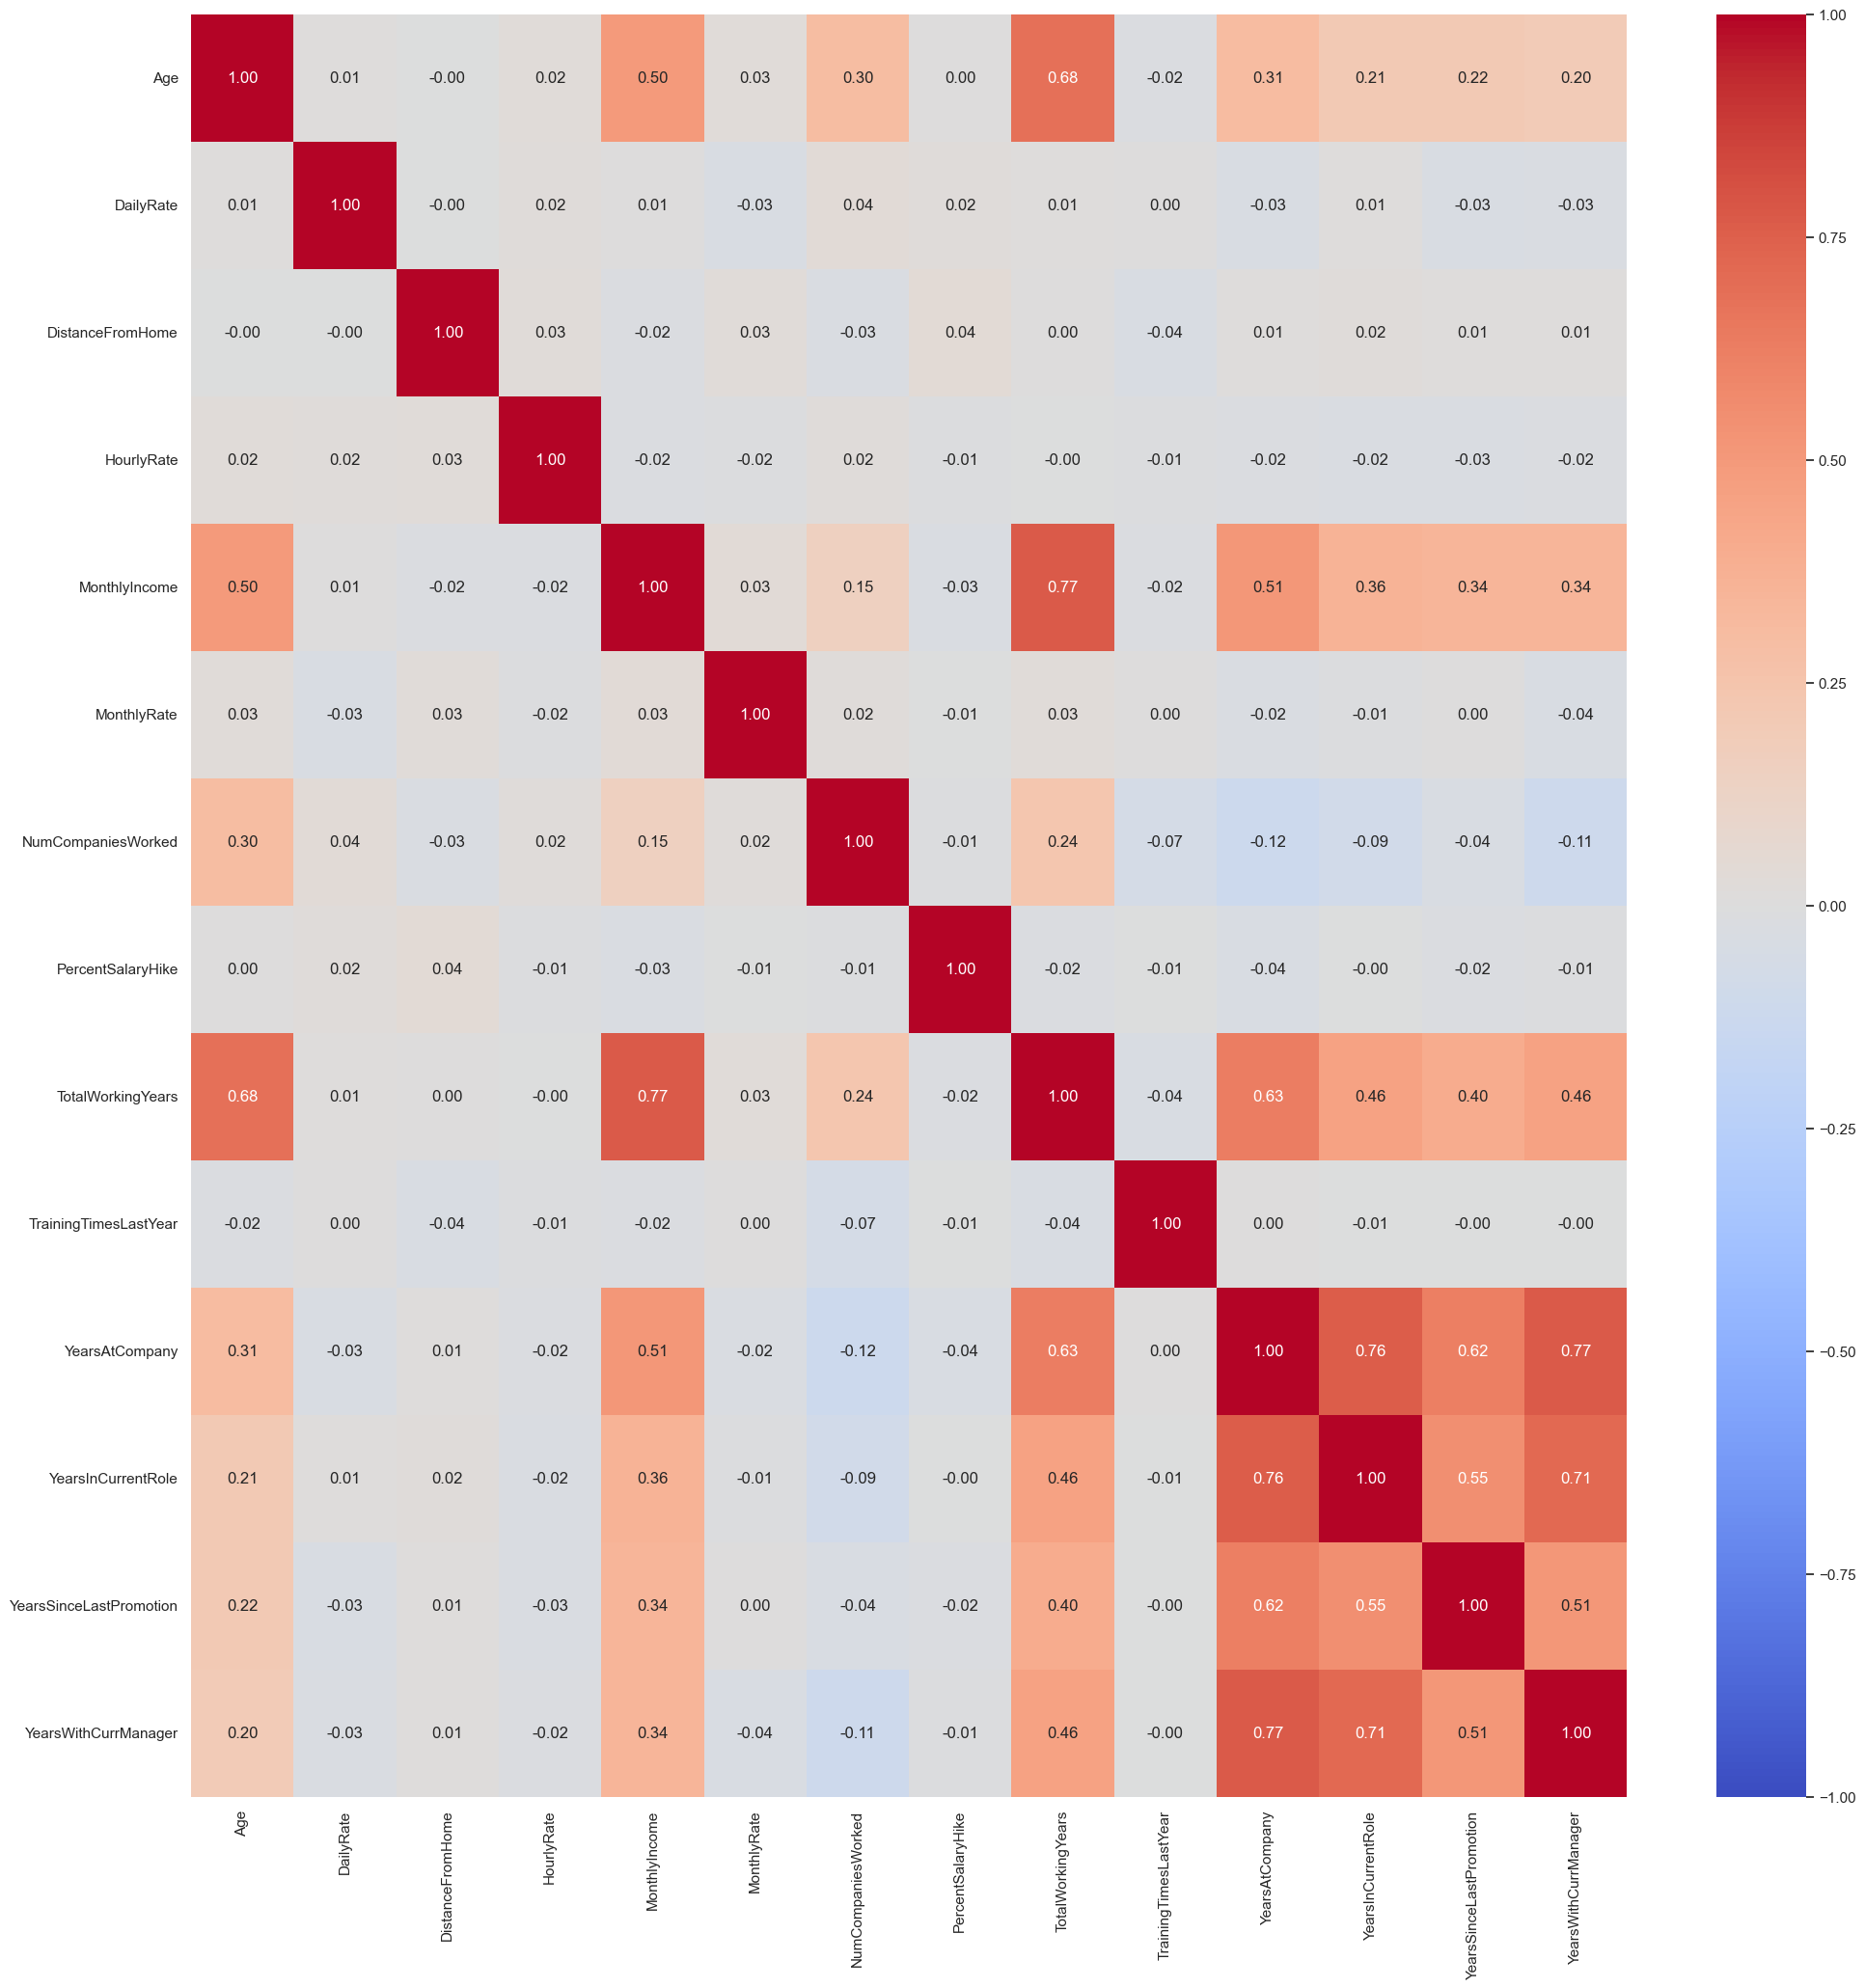

In [15]:
f, axes = plt.subplots(figsize=(24,24))
sb.heatmap(df_int.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f", cmap="coolwarm")

From the correlation heatmap when can derive the following:
- There is a relation between monthlyIncome and TotalWorkingYears
- There is a relation between yearsAtCompany and yearsInCurrentRole
- To add on

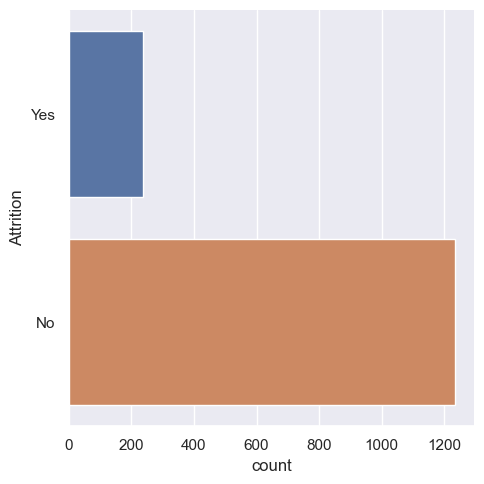

In [16]:
sb.catplot(y="Attrition", data = df, kind="count" )

In [17]:
df_int.hvplot.hist(y='Age', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [18]:
df_int.hvplot.hist(y='DistanceFromHome', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [19]:
df_int.hvplot.hist(y='MonthlyIncome', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [20]:
df_int.hvplot.hist(y='NumCompaniesWorked', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [21]:
df_int.hvplot.hist(y='PercentSalaryHike', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [22]:
df_int.hvplot.hist(y='TotalWorkingYears', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [23]:
df_int.hvplot.hist(y='TrainingTimesLastYear', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [24]:
df_int.hvplot.hist(y='YearsAtCompany', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [25]:
df_int.hvplot.hist(y='YearsInCurrentRole', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [26]:
df_int.hvplot.hist(y='YearsSinceLastPromotion', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [27]:
df_int.hvplot.hist(y='YearsWithCurrManager', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [28]:
df_cat.hvplot.hist(y='BusinessTravel', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [29]:
df_cat.hvplot.hist(y='Department', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [30]:
df_cat.hvplot.hist(y='EducationField', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [31]:
df_cat.hvplot.hist(y='Gender', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [32]:
df_cat.hvplot.hist(y='JobRole', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [33]:
df_cat.hvplot.hist(y='MaritalStatus', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [34]:
df_cat.hvplot.hist(y='OverTime', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [35]:
df_cat.hvplot.hist(y='Education', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [36]:
df_cat.hvplot.hist(y='EnvironmentSatisfaction', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [37]:
df_cat.hvplot.hist(y='JobInvolvement', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [38]:
df_cat.hvplot.hist(y='JobLevel', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [39]:
df_cat.hvplot.hist(y='JobSatisfaction', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [40]:
df_cat.hvplot.hist(y='PerformanceRating', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [41]:
df_cat.hvplot.hist(y='RelationshipSatisfaction', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [42]:
df_cat.hvplot.hist(y='StockOptionLevel', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

In [43]:
df_cat.hvplot.hist(y='WorkLifeBalance', by='Attrition', subplots=False, width=600, height=300, bins=30)
plt.show()

# Machine Learning 

In [44]:
# Import the train_test_split method and smote
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Split data into train and test sets as well as for validation and testing
#df_cat = df_cat.drop(['Attrition'], axis=1)
#df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)
df_final = pd.concat([df_int, df_cat], axis=1)
df_final = df_final.T.drop_duplicates().T
x = df_final.drop(["Attrition"],axis = 1)
y = df_final["Attrition"]
print(x.shape)
print(y.shape)
print(df_final.shape)
train, test, target_train, target_val = train_test_split(x, y, train_size= 0.80,random_state=0);

oversampler= SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(train,target_train)

(1470, 30)
(1470,)
(1470, 31)


In [45]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}
rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)
print("Fitting of Random Forest finished")
rf_predictions = rf.predict(test)
print("Predictions finished")
print("Accuracy score: {}".format(accuracy_score(target_val, rf_predictions)))
print("="*80)
print(classification_report(target_val, rf_predictions))

Fitting of Random Forest finished
Predictions finished
Accuracy score: 0.8537414965986394
              precision    recall  f1-score   support

          No       0.89      0.94      0.91       245
         Yes       0.59      0.41      0.48        49

    accuracy                           0.85       294
   macro avg       0.74      0.68      0.70       294
weighted avg       0.84      0.85      0.84       294



[Text(0.5, 0.9, 'TotalWorkingYears <= 1.5\ngini = 0.269\nsamples = 1176\nvalue = [988, 188]\nclass = No'),
 Text(0.25, 0.7, 'Age <= 26.5\ngini = 0.5\nsamples = 78\nvalue = [39, 39]\nclass = No'),
 Text(0.125, 0.5, 'BusinessTravel <= 0.5\ngini = 0.439\nsamples = 40\nvalue = [13, 27]\nclass = Yes'),
 Text(0.0625, 0.3, 'Education <= 1.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No'),
 Text(0.03125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.09375, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = No'),
 Text(0.1875, 0.3, 'RelationshipSatisfaction <= 3.5\ngini = 0.36\nsamples = 34\nvalue = [8, 26]\nclass = Yes'),
 Text(0.15625, 0.1, 'gini = 0.219\nsamples = 24\nvalue = [3, 21]\nclass = Yes'),
 Text(0.21875, 0.1, 'gini = 0.5\nsamples = 10\nvalue = [5, 5]\nclass = No'),
 Text(0.375, 0.5, 'BusinessTravel <= 1.5\ngini = 0.432\nsamples = 38\nvalue = [26, 12]\nclass = No'),
 Text(0.3125, 0.3, 'DailyRate <= 351.0\ngini = 0.342\nsamples = 32\nvalue = [25, 

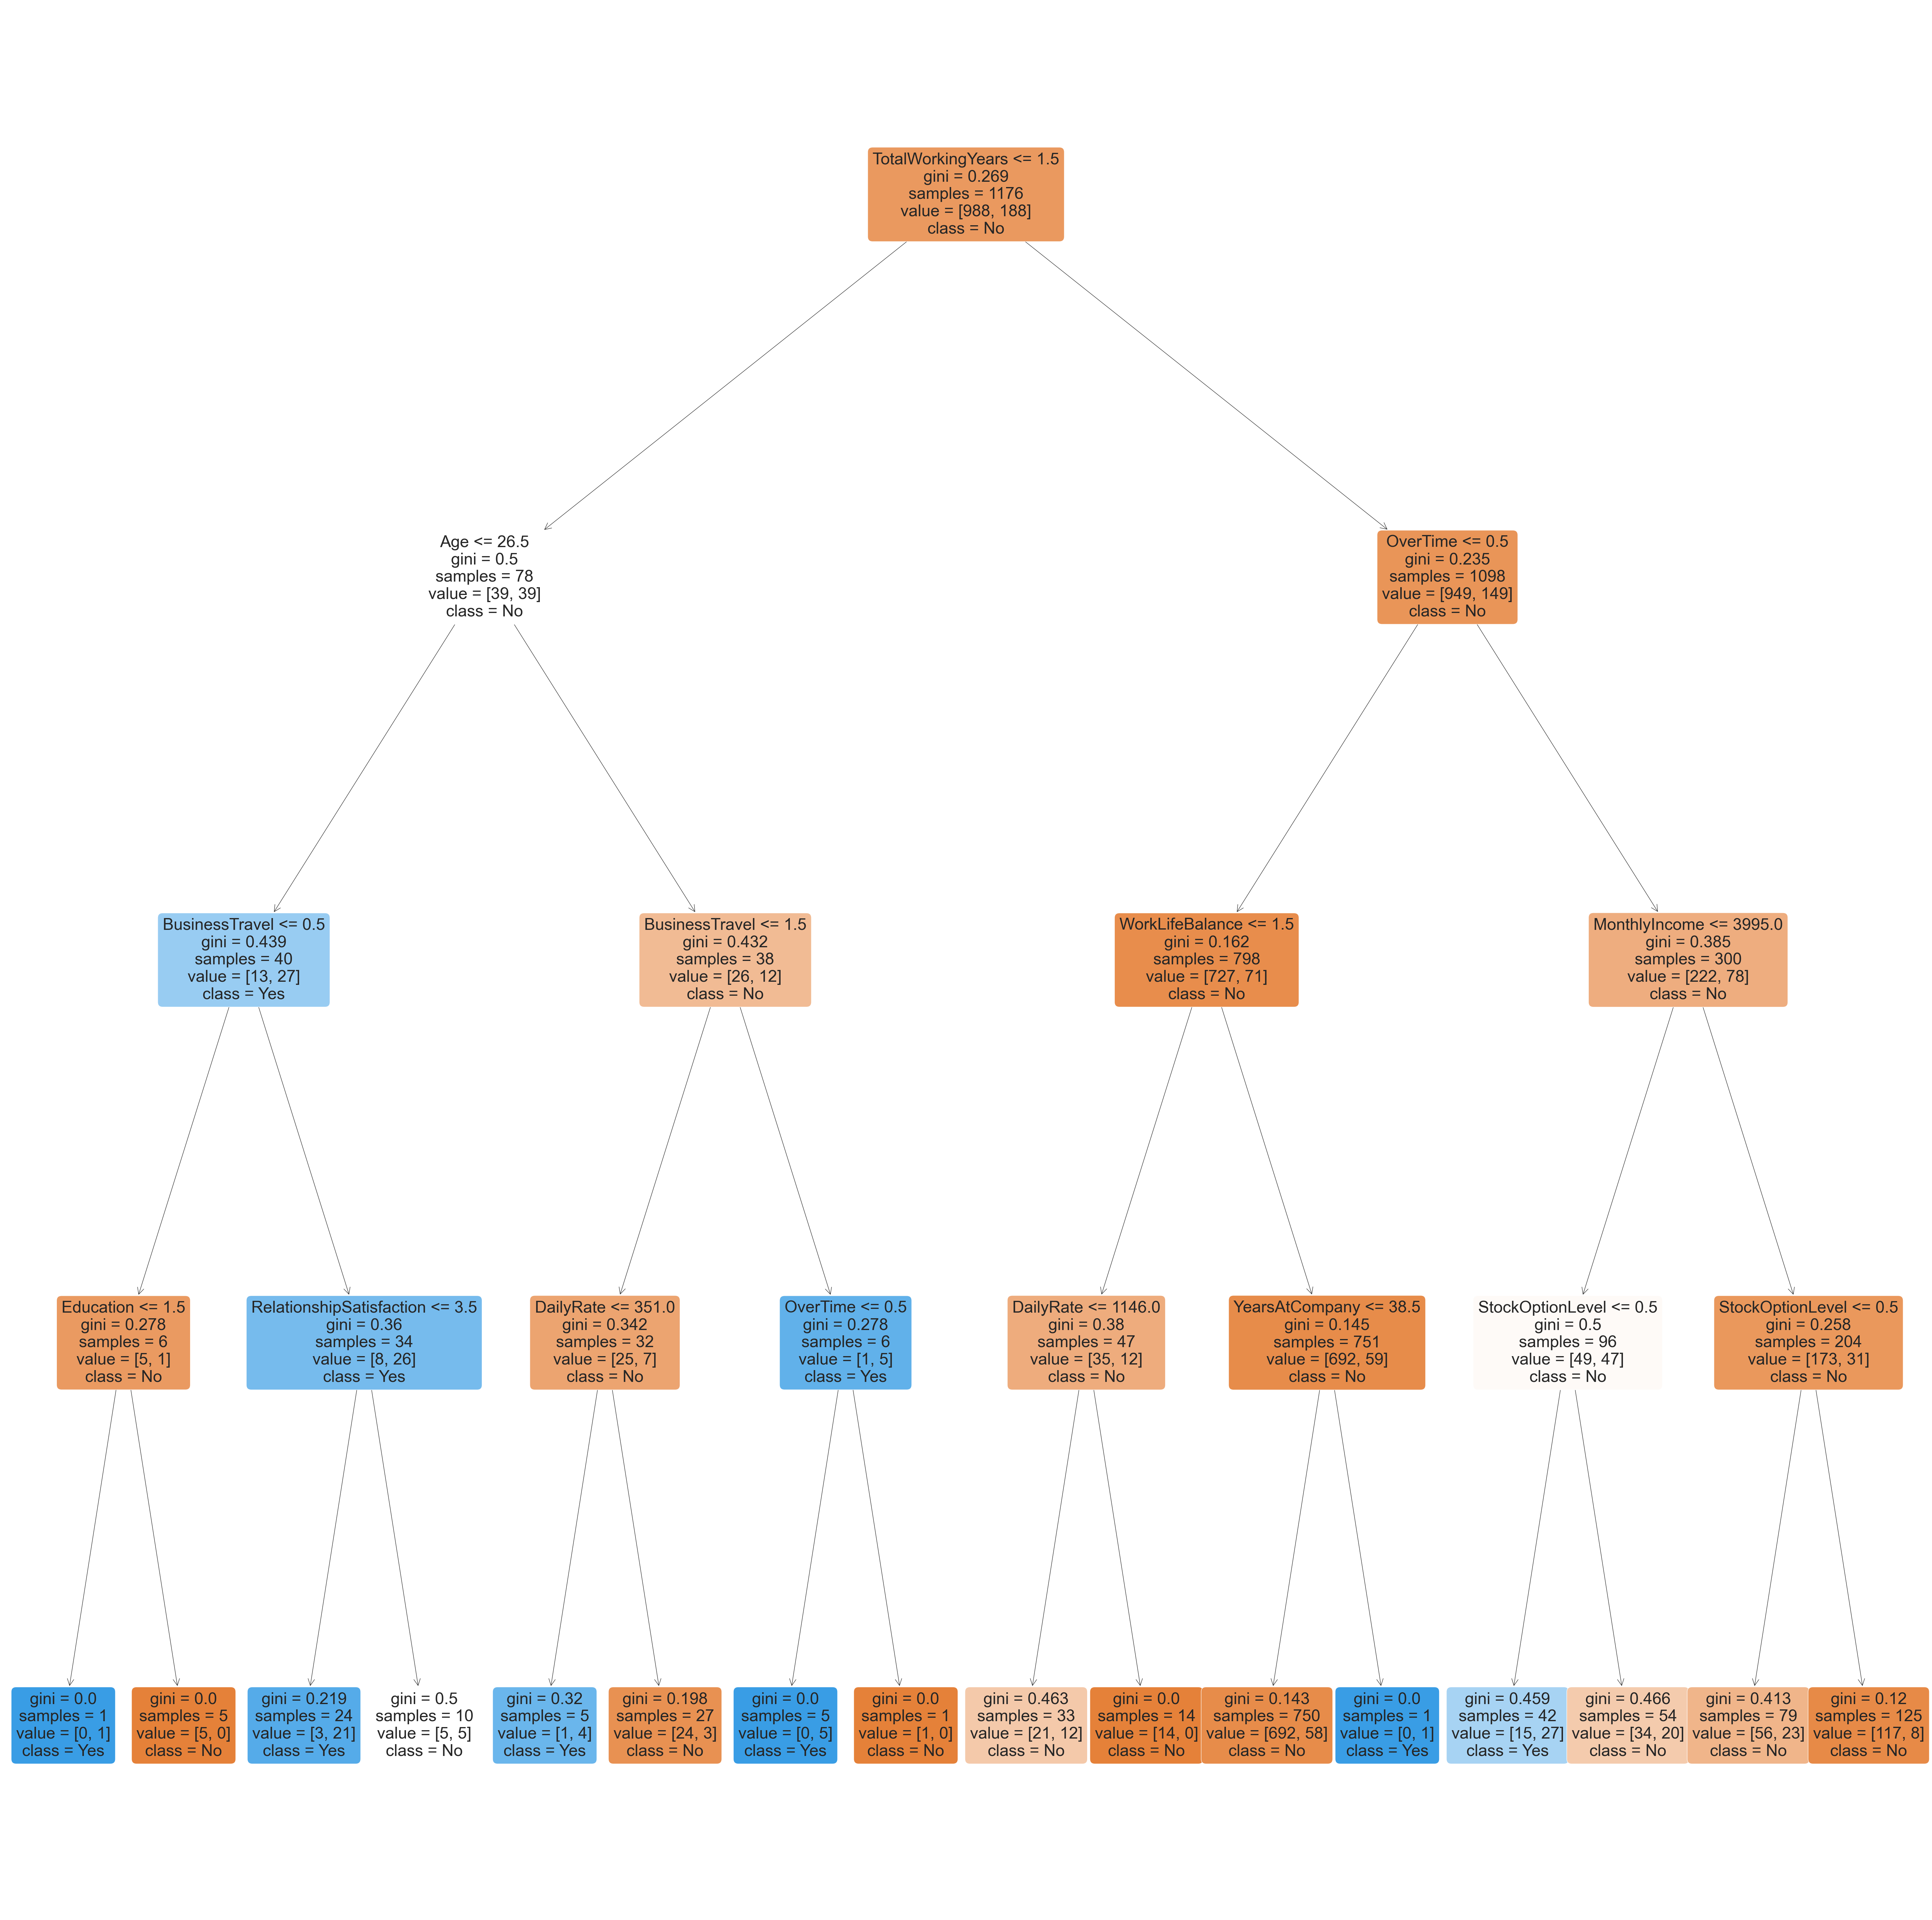

In [46]:
from sklearn.tree import plot_tree
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(train, target_train)

# Predicting results for test dataset
y_pred = decision_tree.predict(test)

from sklearn.tree import plot_tree

f = plt.figure(figsize=(80,80))
plot_tree(decision_tree, filled=True, rounded=True, 
          feature_names=x.columns.values, 
          class_names=["No","Yes"],fontsize =38)